### Importing All Machine Learning Tools Used in This Project

In [25]:
import json
import os
from sklearn.model_selection import train_test_split
from ml_tools.analyzers import Reader, Writer
from ml_tools.plots import ParetoPlotter, RealPredictedPlotter
from ml_tools.predictor import Predictor
from ml_tools.helpers import create_simulation, get_processed_data_from_csv
from ml_tools.trainer import Trainer
from config import FeatureConfigReader, ModelsConfig, Config

### Define the Path to JSON and CSV Files:

- **"[comparison.json](config/comparison.json)":** Used for comparing ML algorithms with different hyperparameters and different feature selections.
- **"[features.json](config/features.json)":** Used to define different feature selection combinations.
- **"[models.json](config/models.json)":** Used to define different ML algorithms employed in this project, specifically "Linear Regression" and "K Nearest Neighbours," along with the Pareto Legend.
- **"[data_P3.csv](CSV_files/data_P3.csv)":** Contains damage index simulation results.




In [26]:
comparison_config_file_name = os.path.join("config", "comparison.json")
features_config_file_name = os.path.join("config", "features.json")
models_config_file_name = os.path.join("config", "models.json")
data_file_name = os.path.join("CSV_files", "data_P3.csv")
results_file_name = "results_comparison"
scaler_options = ["min-max scale"]
ALL_FEATURES_COUNT = 23

### 

### Initialize objects for managing configurations and features

In [27]:
models_config = ModelsConfig(models_config_file_name)
models = models_config.get_model_names()
features_config = FeatureConfigReader(features_config_file_name)
best_features_by_set = features_config.get_all_features_dictionary()

### Data storage dictionaries and lists

In [28]:
pareto_data_sets = { 'R2 vs. MAE': { 'R2' : [], 'MAE' : [] },
                        'MAE vs. FUR': { 'MAE' : [], 'FUR' : [] },
                        'R2 vs. FUR': { 'R2' : [], 'FUR' : [] }}

legend_elements = []
markers = []
colors = []
readers = []

### Define the static portions of your simulation configurations

In [29]:
def create_simulations_config_file(features_set):
    base_simulation = {
        "description": features_set,
        "features": [],
        "model": {
            "type": "",
            "hyper_parameters": {}
        }
    }

    all_simulations = {"simulations": {}}
    simulation_count = 1

    for model in models:
        options = ["no_hyper_params"] if "regression" in model else ["no_hyper_params", "with_hyper_params_optimisation"]

        for option in options:
            
            current_simulation  = create_simulation(base_simulation, features, model, option, models_config)
            
            # Add the current_simulation dictionary to the all_simulations dictionary
            all_simulations["simulations"][f"simulation {simulation_count} {features_set}"] = current_simulation
            
            simulation_count += 1

    with open(comparison_config_file_name, "w") as f:
        json.dump(all_simulations, f, indent=4)

### This function is used to obtain values for a Pareto plot.

In [30]:
def get_value_for_pareto_plot(reader, indicator, data_type):
    for performance in reader.performances:
        if performance.indicator == indicator and performance.data_type == data_type:
            if indicator == "R2":
                return (1-performance.value)
            else:
                return performance.value
    return None

### Main Loop Through Feature Sets

This section is used to analyze the performance of all machine learning algorithms, whether with optimized hyperparameters or not (defined in `models.json` file), for all cases specified in the `features.json` file.


---------------------------
Linear regression: MAE (test): 0.23 | MSE (test): 0.11 | R2 (test): 0.56 | MAE (train): 0.23 | MSE (train): 0.1 | R2 (train): 0.56 | 


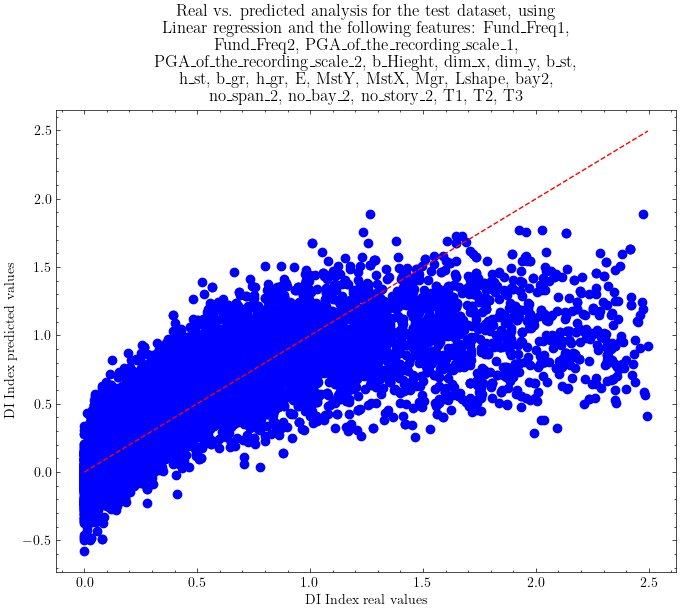

---------------------------
K Nearest Neighbours: MAE (test): 0.15 | MSE (test): 0.08 | R2 (test): 0.67 | MAE (train): 0.11 | MSE (train): 0.05 | R2 (train): 0.81 | 


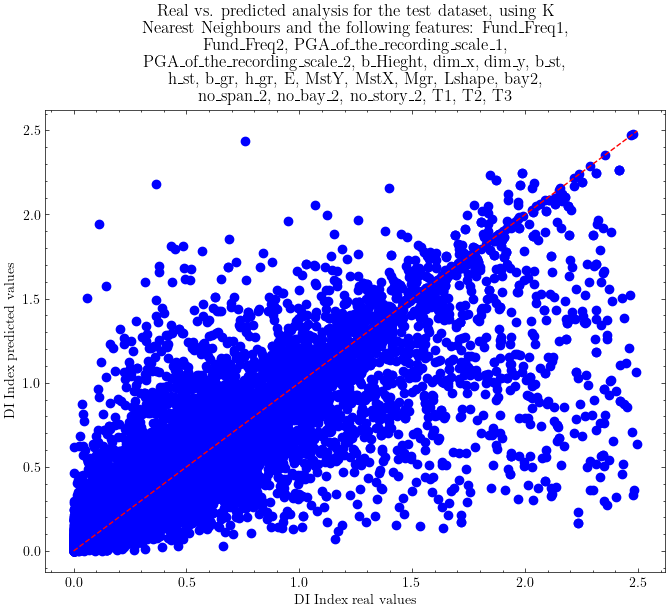

---------------------------
Optimised K Nearest Neighbours: MAE (test): 0.09 | MSE (test): 0.05 | R2 (test): 0.78 | MAE (train): 0.0 | MSE (train): 0.0 | R2 (train): 1.0 | 


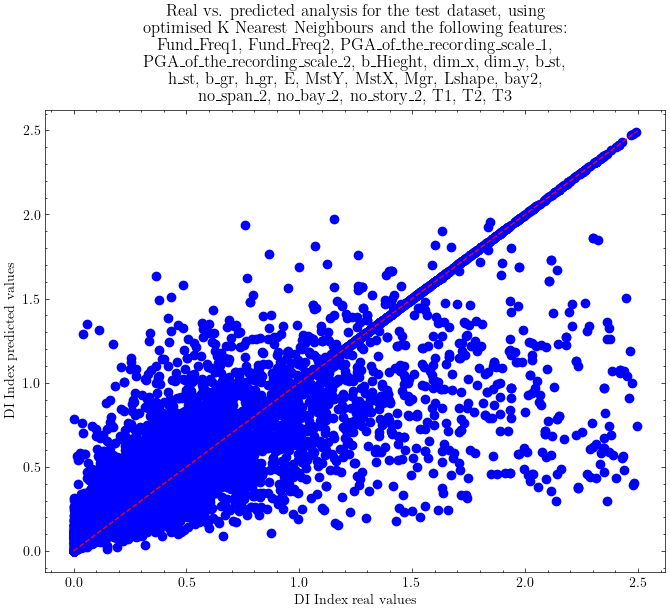

---------------------------
Linear regression: MAE (test): 0.24 | MSE (test): 0.12 | R2 (test): 0.51 | MAE (train): 0.24 | MSE (train): 0.12 | R2 (train): 0.51 | 


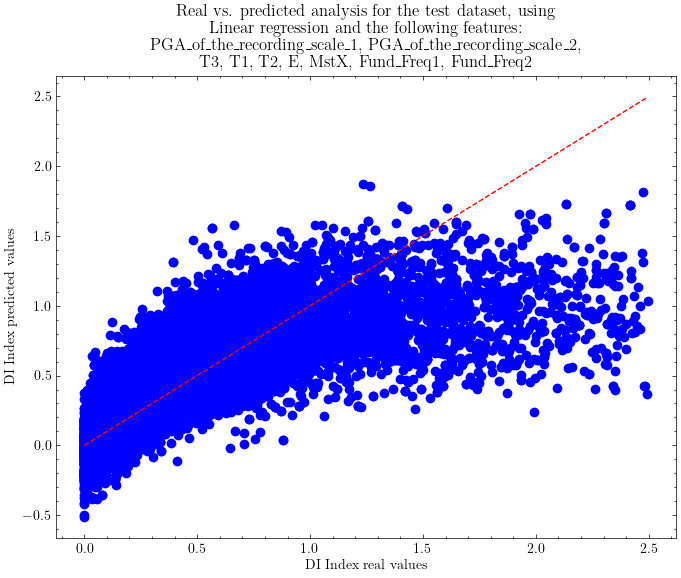

---------------------------
K Nearest Neighbours: MAE (test): 0.13 | MSE (test): 0.06 | R2 (test): 0.75 | MAE (train): 0.1 | MSE (train): 0.04 | R2 (train): 0.84 | 


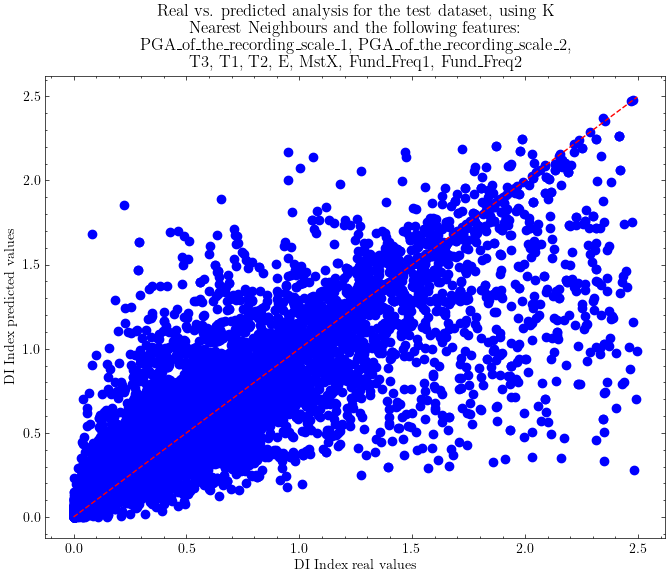

---------------------------
Optimised K Nearest Neighbours: MAE (test): 0.08 | MSE (test): 0.04 | R2 (test): 0.83 | MAE (train): 0.0 | MSE (train): 0.0 | R2 (train): 1.0 | 


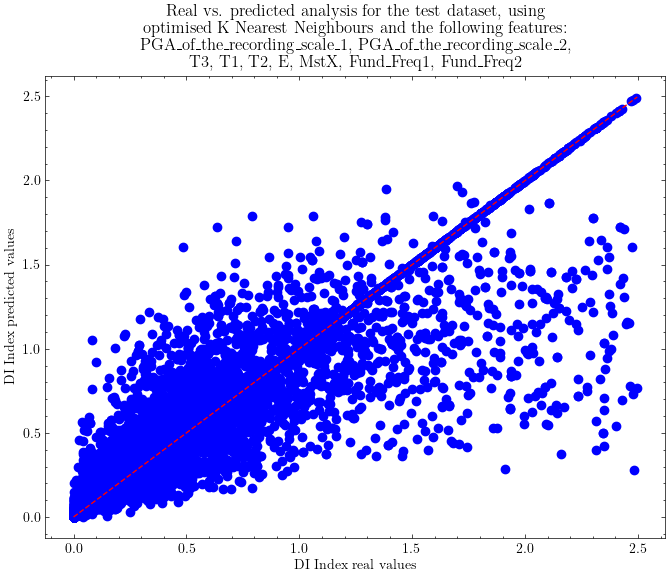

---------------------------
Linear regression: MAE (test): 0.25 | MSE (test): 0.13 | R2 (test): 0.46 | MAE (train): 0.25 | MSE (train): 0.13 | R2 (train): 0.46 | 


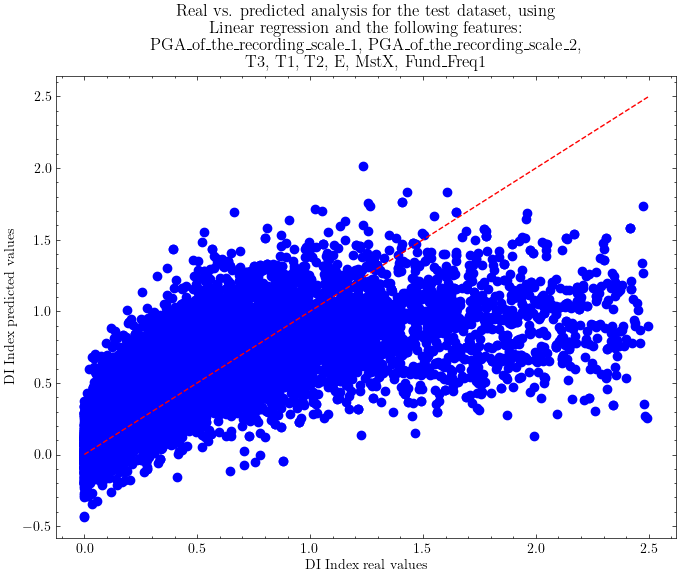

---------------------------
K Nearest Neighbours: MAE (test): 0.15 | MSE (test): 0.07 | R2 (test): 0.7 | MAE (train): 0.11 | MSE (train): 0.05 | R2 (train): 0.81 | 


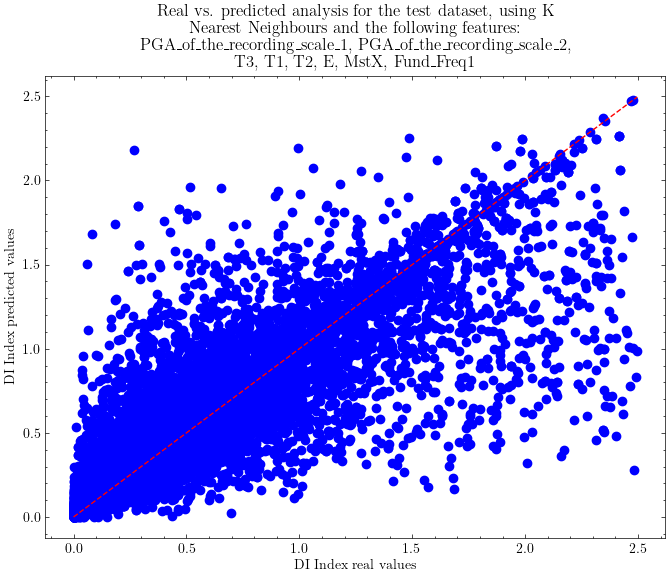

---------------------------
Optimised K Nearest Neighbours: MAE (test): 0.09 | MSE (test): 0.05 | R2 (test): 0.8 | MAE (train): 0.0 | MSE (train): 0.0 | R2 (train): 1.0 | 


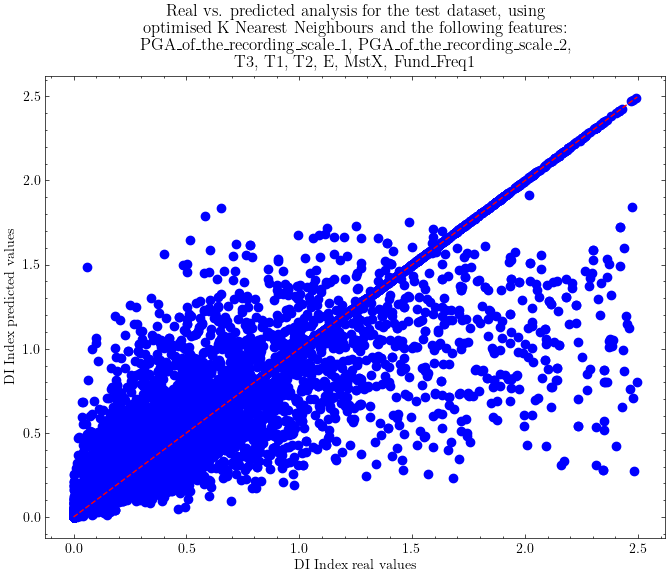

---------------------------
Linear regression: MAE (test): 0.26 | MSE (test): 0.14 | R2 (test): 0.42 | MAE (train): 0.26 | MSE (train): 0.14 | R2 (train): 0.42 | 


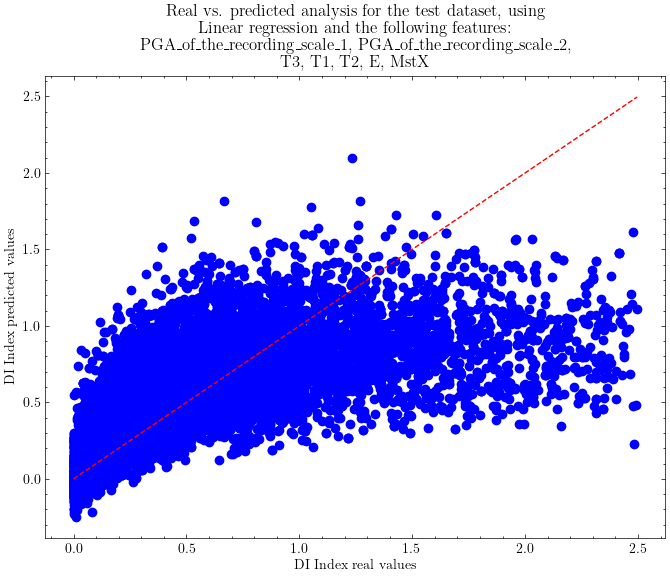

---------------------------
K Nearest Neighbours: MAE (test): 0.17 | MSE (test): 0.09 | R2 (test): 0.62 | MAE (train): 0.13 | MSE (train): 0.06 | R2 (train): 0.77 | 


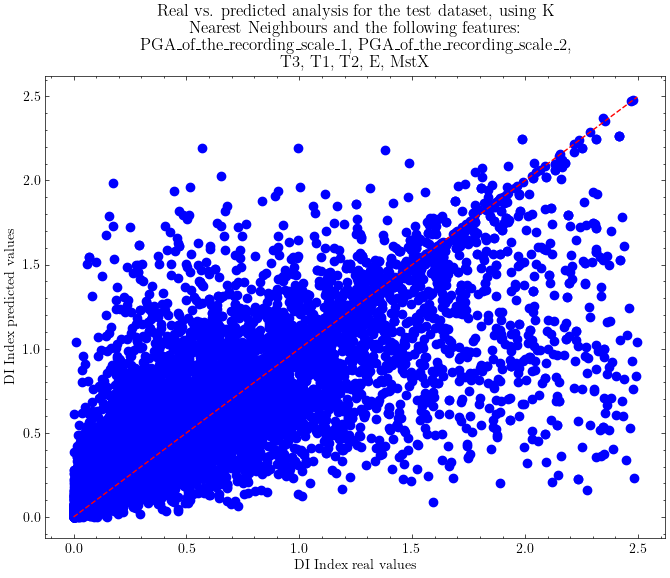

---------------------------
Optimised K Nearest Neighbours: MAE (test): 0.1 | MSE (test): 0.06 | R2 (test): 0.76 | MAE (train): 0.0 | MSE (train): 0.0 | R2 (train): 1.0 | 


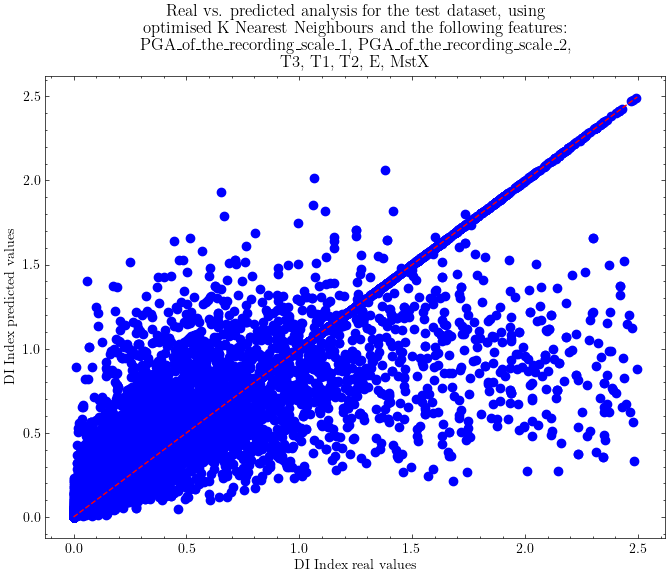

---------------------------
Linear regression: MAE (test): 0.27 | MSE (test): 0.15 | R2 (test): 0.38 | MAE (train): 0.27 | MSE (train): 0.14 | R2 (train): 0.39 | 


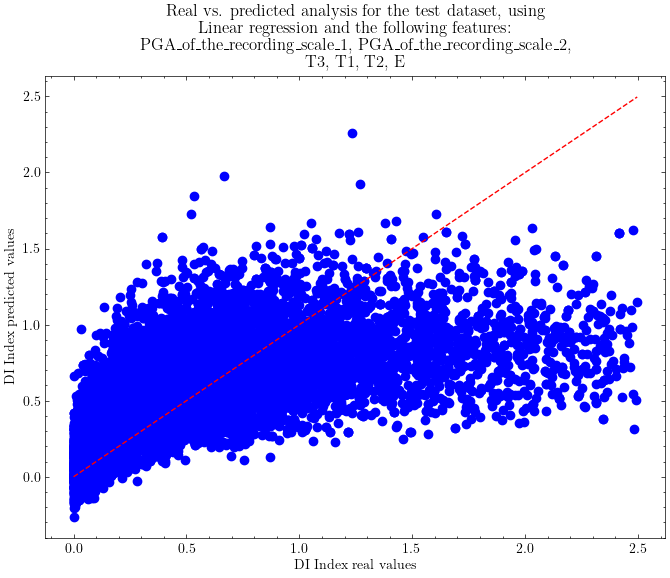

---------------------------
K Nearest Neighbours: MAE (test): 0.18 | MSE (test): 0.1 | R2 (test): 0.58 | MAE (train): 0.14 | MSE (train): 0.06 | R2 (train): 0.74 | 


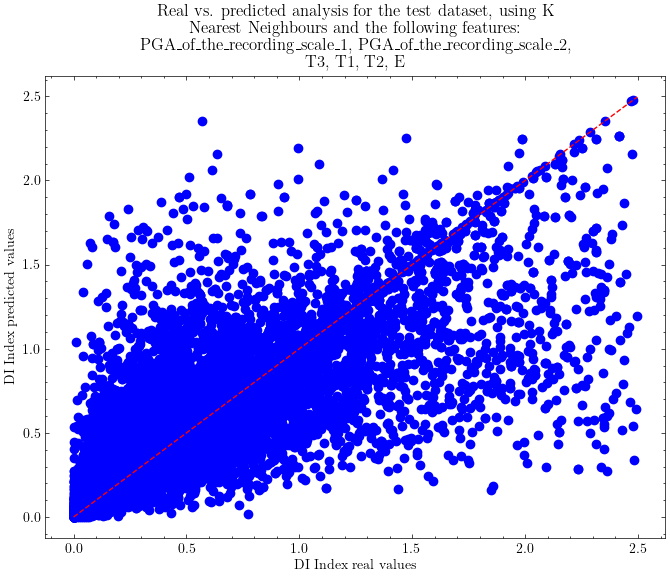

---------------------------
Optimised K Nearest Neighbours: MAE (test): 0.1 | MSE (test): 0.06 | R2 (test): 0.75 | MAE (train): 0.0 | MSE (train): 0.0 | R2 (train): 1.0 | 


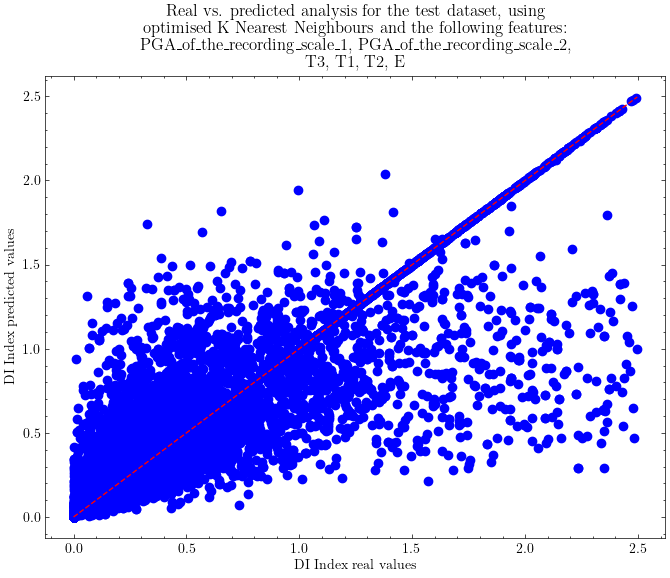

---------------------------
Linear regression: MAE (test): 0.32 | MSE (test): 0.19 | R2 (test): 0.22 | MAE (train): 0.32 | MSE (train): 0.19 | R2 (train): 0.22 | 


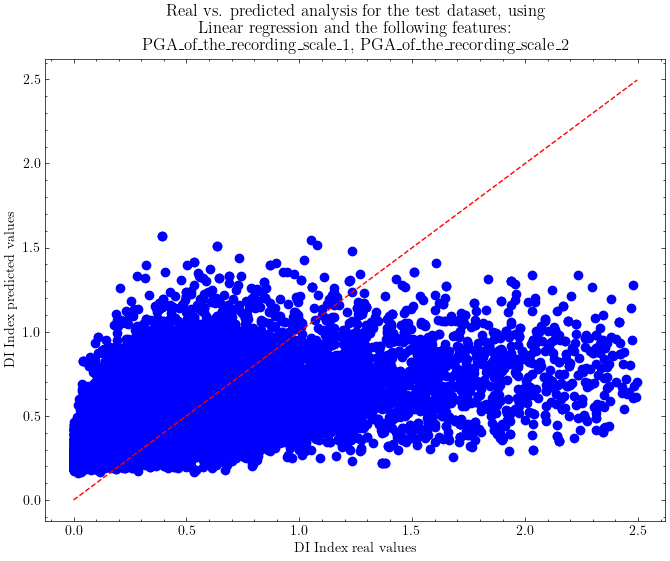

---------------------------
K Nearest Neighbours: MAE (test): 0.24 | MSE (test): 0.14 | R2 (test): 0.43 | MAE (train): 0.18 | MSE (train): 0.08 | R2 (train): 0.65 | 


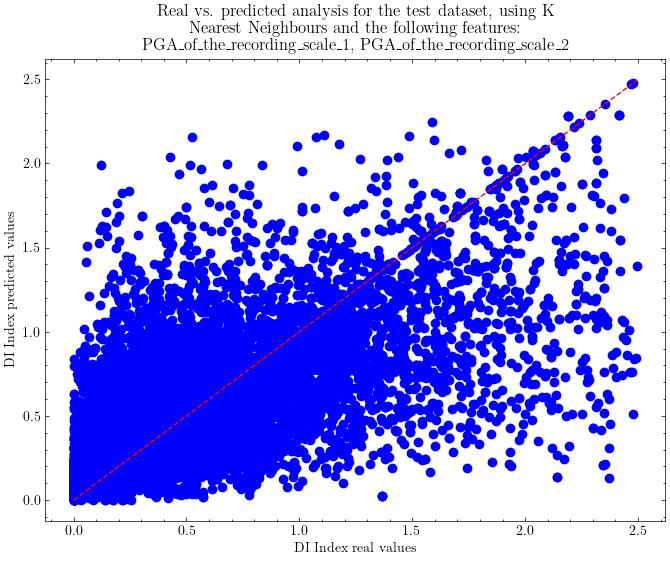

---------------------------
Optimised K Nearest Neighbours: MAE (test): 0.17 | MSE (test): 0.1 | R2 (test): 0.58 | MAE (train): 0.05 | MSE (train): 0.02 | R2 (train): 0.93 | 


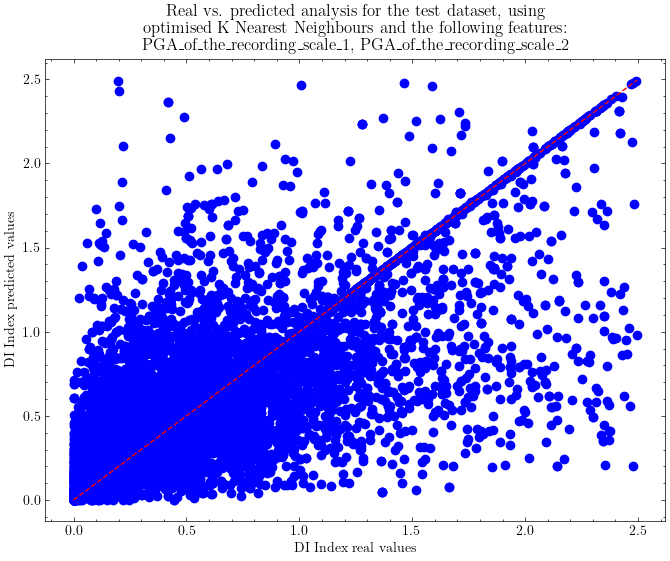

In [31]:
for features_set, features in best_features_by_set.items():

    create_simulations_config_file(features_set)

    # Machine learning analysis
    processed_data = get_processed_data_from_csv(data_file_name)

    y = processed_data['DI_cladire'] 

    config = Config(comparison_config_file_name)
    
    simulations = config.get_simulations()
    
    for simulation in simulations:

        selected_features = config.get_features(simulation)
        x = processed_data[selected_features]
        model_type = config.get_model_type(simulation)
        hyper_params = config.get_hyper_parameters(simulation)
        
        if hyper_params:
            option = "with hyper-params"
        else:
            option = ""
        
        if "min-max scale" in scaler_options:
            trainer = Trainer(x, y, model_type, hyper_params, use_min_max_scale=True)
        else:
            trainer = Trainer(x, y, model_type, hyper_params)
        trainer.set_train_test_data(test_size=0.2)
        trainer.train_model()
        
        predictor = Predictor(trainer)
        predictor.set_prediction_on_test()
        predictor.set_prediction_on_train()

        reader = Reader(simulation, trainer, predictor)
        reader.set_performances_on_test_data()
        reader.set_performances_on_train_data()

        print("---------------------------")
        reader.print_performances()
        readers.append(reader)
        
        writer = Writer(config, simulation,reader.performances, results_file_name)
        writer.append_to_csv()
        
        # Collecting performance data for plotting
        pareto_data_sets["R2 vs. MAE"]["R2"].append(get_value_for_pareto_plot(reader, "R2", "test"))
        pareto_data_sets["R2 vs. MAE"]["MAE"].append(get_value_for_pareto_plot(reader, "MAE", "test"))
        pareto_data_sets["R2 vs. FUR"]["R2"].append(get_value_for_pareto_plot(reader, "R2", "test"))
        pareto_data_sets["R2 vs. FUR"]["FUR"].append(len(features)/ALL_FEATURES_COUNT)
        pareto_data_sets["MAE vs. FUR"]["MAE"].append(get_value_for_pareto_plot(reader, "MAE", "test"))
        pareto_data_sets["MAE vs. FUR"]["FUR"].append(len(features)/ALL_FEATURES_COUNT)
        
        legend_elements.append(f"{model_type} {option}, {features_set}")
        
        marker = features_config.get_pareto_marker(features_set)
        markers.append(marker)  
        
        color = models_config.get_pareto_color(model_type, option)
        colors.append(color) 
        
        plotter = RealPredictedPlotter(config, "figs", False, simulation, features_set, features, trainer, predictor)
        plotter.generate_plot()

### Generate Pareto Plots for All ML Algorithms and Feature Selection Simulation Cases

Choose "False" to display figures instead of saving them.

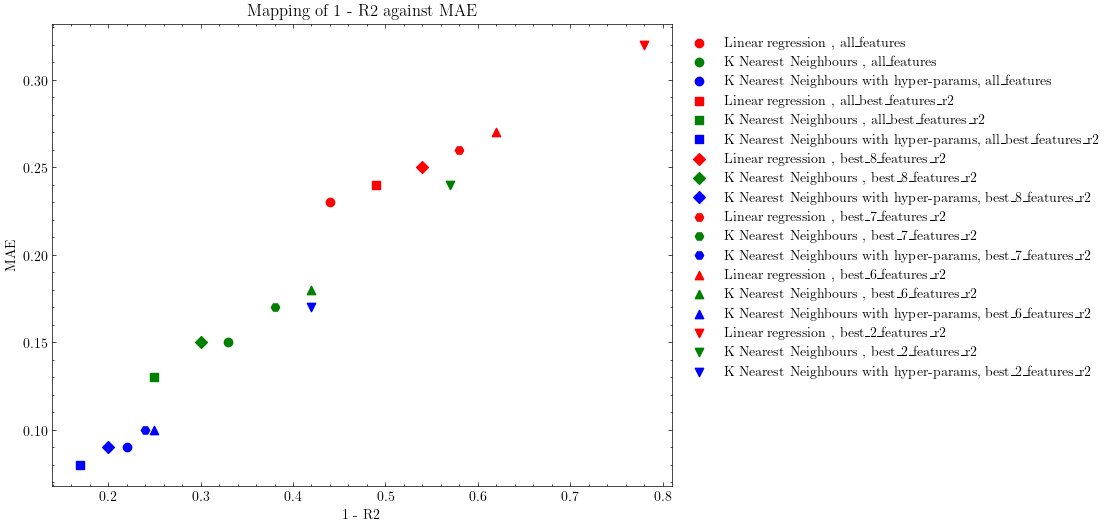

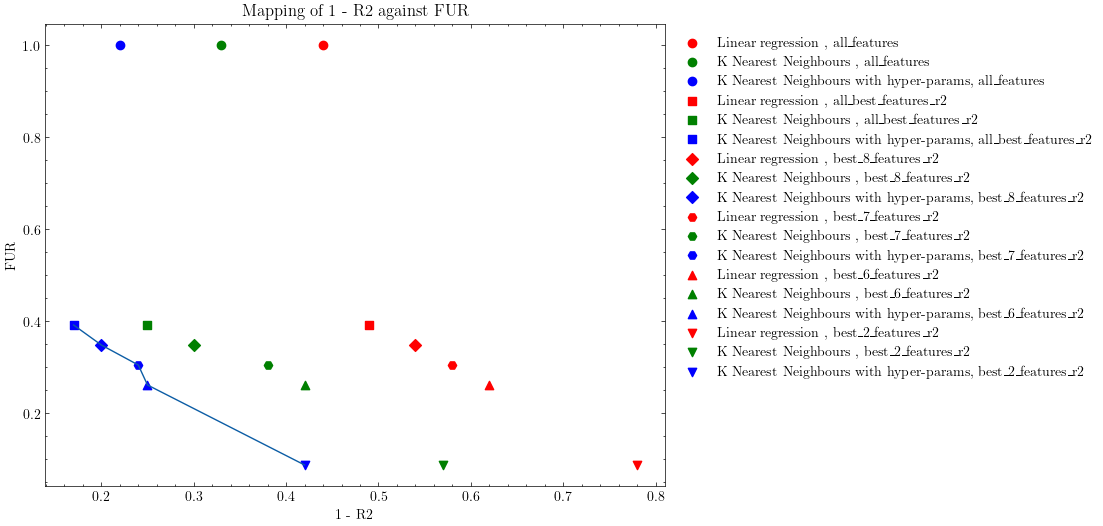

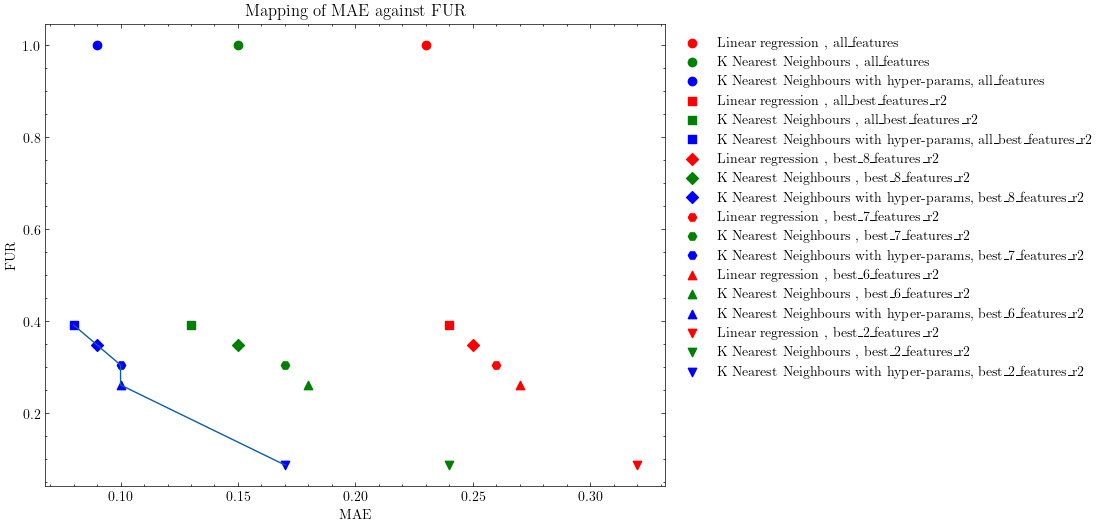

In [32]:
plotter = ParetoPlotter("figs", False, pareto_data_sets["R2 vs. MAE"]["R2"], 
                        pareto_data_sets["R2 vs. MAE"]["MAE"], 
                        "1 - R2", "MAE", legend_elements, markers, colors)
plotter.generate_plot()    

plotter = ParetoPlotter("figs", False, pareto_data_sets["R2 vs. FUR"]["R2"], 
                        pareto_data_sets["R2 vs. FUR"]["FUR"], 
                        "1 - R2", "FUR", legend_elements, markers, colors)
plotter.generate_plot()    

plotter = ParetoPlotter("figs", False, pareto_data_sets["MAE vs. FUR"]["MAE"], 
                        pareto_data_sets["MAE vs. FUR"]["FUR"], 
                        "MAE", "FUR", legend_elements, markers, colors)
plotter.generate_plot() 